In [105]:
import pandas as pd # for data manupulation or analysis
import numpy as np # for numeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns

In [106]:
diab_df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [107]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [108]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


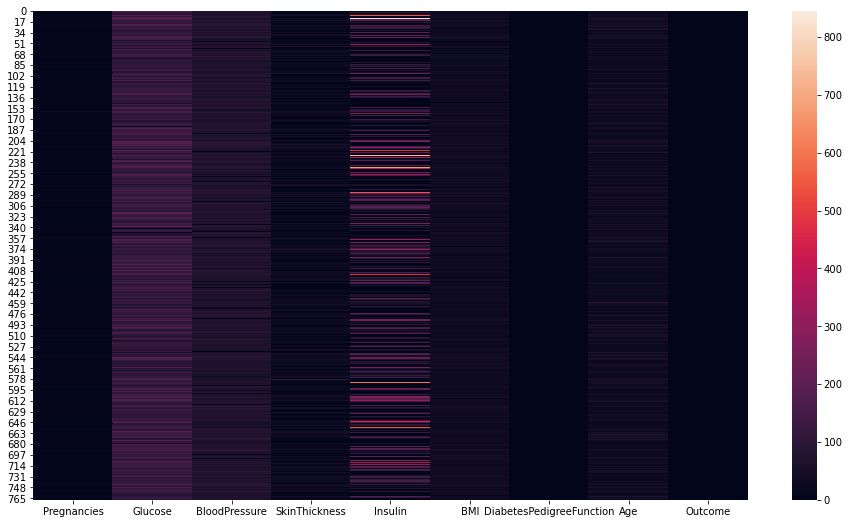

In [109]:
plt.figure(figsize=(16,9))
sns.heatmap(diab_df)

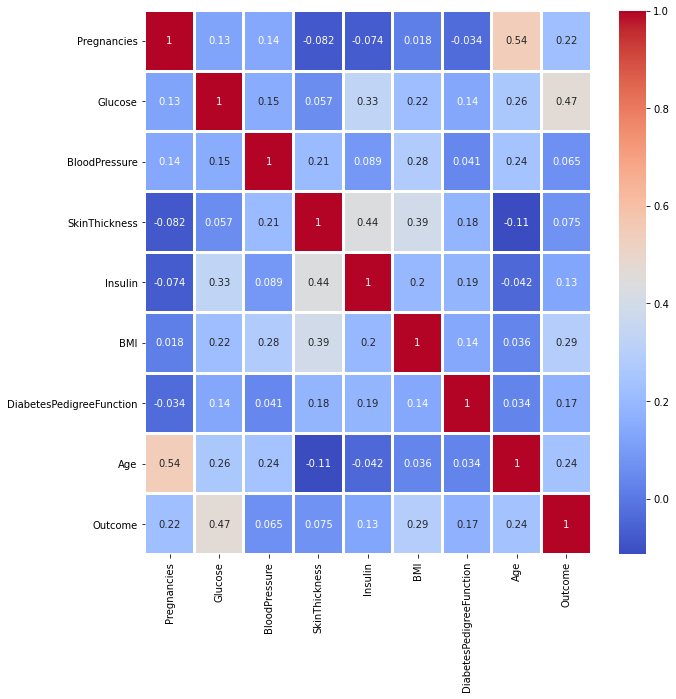

In [110]:
diab_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(diab_df.corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [111]:
diab_df.shape

(768, 9)

In [112]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [113]:
X = diab_df.drop(['Outcome'], axis = 1) 
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [114]:
y = diab_df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [115]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [117]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [118]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score  
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuarcy_lr=accuracy_score(y_test, y_pred_lr)
print(accuarcy_lr)

0.7792207792207793


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [119]:
from sklearn.svm import SVC

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuarcy_svm=accuracy_score(y_test, y_pred_scv)
print(accuarcy_svm)

0.7532467532467533


In [120]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion ='entropy')
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.7142857142857143


In [121]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 10)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.7597402597402597


In [122]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(accuracy_xgb)

0.7662337662337663


In [123]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
y_pred_ada = ada_classifier.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_gb)
print(accuracy_ada)

0.5909090909090909


In [124]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)]

ada_params = {'n_estimators' : n_estimators,
             'learning_rate' : [0.05, 0.15, 0.25, 0.35, 0.45, 0.50, 0.55, 0.65, 0.75, 0.85, 0.95, 1],
              'algorithm' : ['SAMME', 'SAMME.R']}

print(ada_params)

{'n_estimators': [10, 32, 55, 77, 100], 'learning_rate': [0.05, 0.15, 0.25, 0.35, 0.45, 0.5, 0.55, 0.65, 0.75, 0.85, 0.95, 1], 'algorithm': ['SAMME', 'SAMME.R']}


In [125]:
xgb_params={
 "learning_rate" : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma" : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [126]:
from sklearn.model_selection import RandomizedSearchCV

xgb_random_search = RandomizedSearchCV(xgb_classifier, param_distributions = xgb_params,
                                       scoring= 'roc_auc',
                                       n_jobs= -1, verbose= 3)
ada_random_search = RandomizedSearchCV(ada_classifier, param_distributions = ada_params,
                                       scoring= 'roc_auc',
                                       n_jobs= -1, verbose= 3)

xgb_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.1s finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           num_paralle...0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
        

In [127]:
ada_random_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished


RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=25), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.05, 0.15, 0.25,
                                                          0.35, 0.45, 0.5, 0.55,
                                                          0.65, 0.75, 0.85,
                                                          0.95, 1],
                                        'n_estimators': [10, 32, 55, 77, 100]},
                   scoring='roc_auc', verbose=3)

In [128]:
ada_random_search.best_params_

{'n_estimators': 77, 'learning_rate': 0.25, 'algorithm': 'SAMME'}

In [129]:
tuned_ada_classifier = AdaBoostClassifier(n_estimators = 32, learning_rate = 0.35, 
                                          algorithm = 'SAMME.R')

In [130]:
tuned_ada_classifier.fit(X_train, y_train)
y_pred_tuned_ada = tuned_ada_classifier.predict(X_test)
accuracy_tuned_ada = accuracy_score(y_test, y_pred_tuned_xgb)
print(accuracy_tuned_ada)

0.5584415584415584


In [131]:
tuned_xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
                                           tree_method='exact',
                                           validate_parameters=1,
                                           verbosity=None)

In [132]:
tuned_xgb_classifier.fit(X_train, y_train)
y_pred_tuned_xgb = tuned_xgb_classifier.predict(X_test)
accuracy_tuned_xgb = accuracy_score(y_test, y_pred_tuned_xgb)
print(accuracy_tuned_xgb)

0.7662337662337663
